# Лабораторная работа №3
## Числовые характеристики выборки

**Задание**
1. Изучить теоретический материал (*см. вложенный pdf файл, стр 6 - 7*)
2. Найти в открытых источниках, или выдумать выборку непрерывных данных. Можно использовать данные из приложенного csv файла. (Описание данных: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download)
3. Реализовать скрипт в Python для загрузки данных (соответствующие команды найти самостоятельно). Вариант использования команд из библиотеки `numpy` для загрузки данных из примера см. ниже.
4. Посчитать и вывести основные числовые характеристики выборки (среднее, дисперсию, стандартное отклонение, медиану). 
5. Вывести гистограмму исследуемых данных. Сделать предположение о законе распределения исследуемых данных.

In [19]:
import csv
with open('StudentsPerformance.csv', 'r', newline='') as csvfile:
    spamreader = csv.reader(csvfile,  quotechar='|')
    data = [el for el in spamreader]
    [print(i) for i in data[0:3]]

['female', 'group B', "bachelor's degree", 'standard', 'none', '72', '72', '74']
['female', 'group C', 'some college', 'standard', 'completed', '69', '90', '88']
['female', 'group B', "master's degree", 'standard', 'none', '90', '95', '93']


In [14]:
def mean(xs): 
    '''Среднее значение числового ряда'''
    return sum(xs) / len(xs) 

print(f'средний балл по математике  {mean([int(i[5]) for i in data])}')

print(f'средний балл за чтение  {mean([int(i[6]) for i in data])}')

print(f'средний балл за письмо  {mean([int(i[7]) for i in data])}')

средний балл по математике  66.089
средний балл за чтение  69.169
средний балл за письмо  68.054


In [15]:
def median(xs):
    '''Медиана числового ряда'''
    n = len(xs)
    mid = n // 2
    if n % 2 == 1:
        return sorted(xs)[mid]
    else:
        return mean( sorted(xs)[mid-1:][:2] )
    
print(f'медианный балл по математике  {median([int(i[5]) for i in data])}')

print(f'медианный балл за чтение  {median([int(i[6]) for i in data])}')

print(f'медианный балл за письмо  {median([int(i[7]) for i in data])}')

средний балл по математике  66.0
средний балл за чтение  70.0
средний балл за письмо  69.0


In [21]:
def variance(xs):
    '''Дисперсия числового ряда,
       несмещенная дисперсия при n <= 30'''
    mu = mean(xs)
    n = len(xs)
    n = n-1 if n in range(1, 30) else n  
    square_deviation = lambda x : (x - mu) ** 2 
    return sum( map(square_deviation, xs) ) / n

print(f'Дисперсия для баллов по математике  {variance([int(i[5]) for i in data])}')

print(f'Дисперсия для баллов за чтение  {variance([int(i[6]) for i in data])}')

print(f'Дисперсия для баллов  за письмо  {variance([int(i[7]) for i in data])}')

Дисперсия для баллов по математике  229.68907900000048
Дисперсия для баллов за чтение  212.9524390000001
Дисперсия для баллов  за письмо  230.6770839999997


In [22]:
import math
def standard_deviation(xs):
    '''Стандартное отклонение числового ряда'''
    return math.sqrt( variance(xs) )

print(f'Стандартное отклонение для баллов по математике  {standard_deviation([int(i[5]) for i in data])}')

print(f'Стандартное отклонение для баллов за чтение  {standard_deviation([int(i[6]) for i in data])}')

print(f'Стандартное отклонение для баллов  за письмо  {standard_deviation([int(i[7]) for i in data])}')

Стандартное отклонение для баллов по математике  15.155496659628165
Стандартное отклонение для баллов за чтение  14.59289001534652
Стандартное отклонение для баллов  за письмо  15.188057281956757


Text(0.5, 1.0, 'баллов  за письмо')

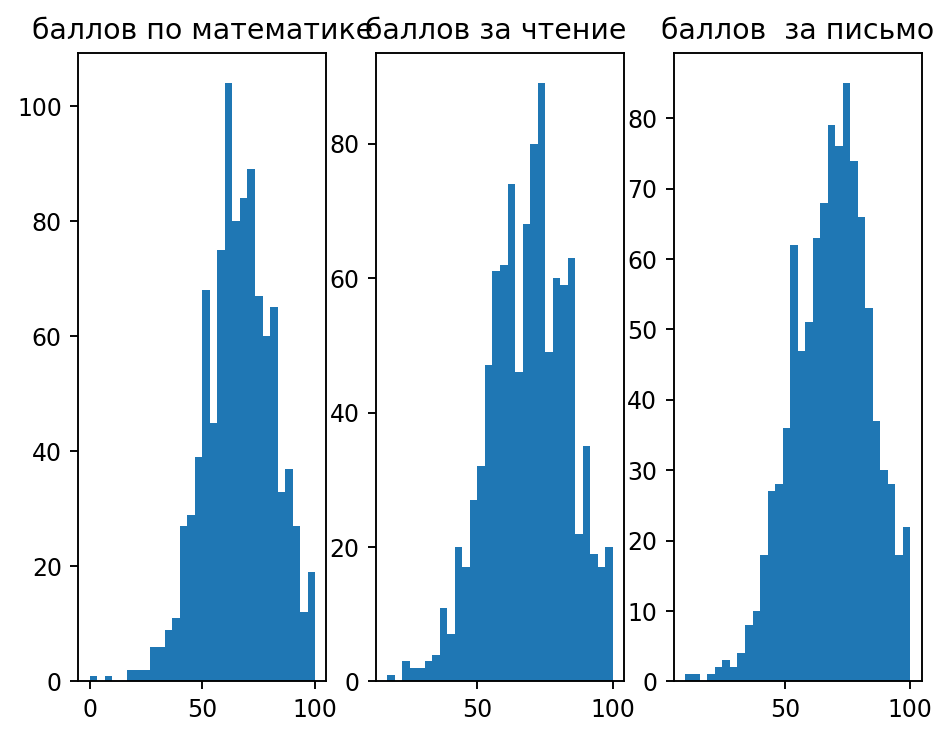

In [44]:
import matplotlib.pyplot as plt
bins = 30
fig, axs = plt.subplots(1,3,  dpi=170)
axs[0].hist([int(i[5]) for i in data], bins =bins)
axs[0].set_title('баллов по математике')

axs[1].hist([int(i[6]) for i in data], bins =bins)
axs[1].set_title('баллов за чтение ')

axs[2].hist([int(i[7]) for i in data], bins =bins)
axs[2].set_title('баллов  за письмо')

на гистограммах по оси x показано количество баллов, а по оси у количество людей написавших на этот балл
предположение о законе распределения следующий 